### Importing basic packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset

In [2]:
 
df = pd.read_csv(r'D:\DS\INSAID\Fraud.csv')

In [3]:
print(df.shape)
df.head()

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Data Dictionary:

- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- amount - amount of the transaction in local currency.

- nameOrig - customer who started the transaction

- oldbalanceOrg - initial balance before the transaction

- newbalanceOrig - new balance after the transaction

- nameDest - customer who is the recipient of the transaction

- oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

- newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Checking for Null values & dropping null data points

In [4]:

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:

df=df.dropna()

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Features & Data types

In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Statistical description of all features

In [9]:

df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00



### Correlation between features 

In [10]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


### Heatmap (visual correlation b/w features)

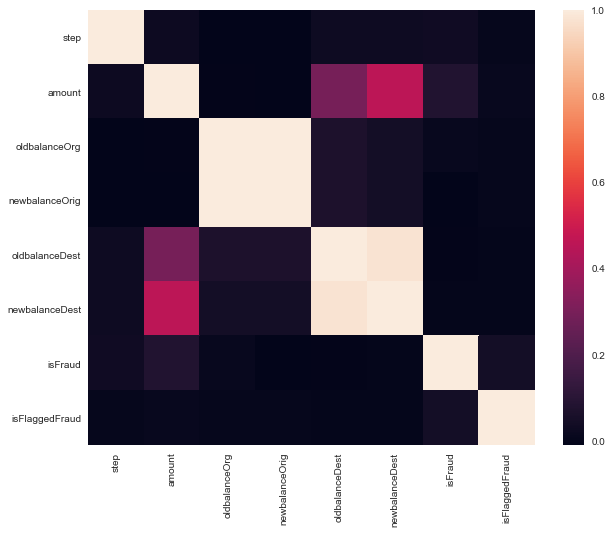

In [11]:
sns.set(rc={'figure.figsize':(10,8)})
corr = df.corr()
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)
plt.show()

###  Counts of fraud and not-fraud data

0    6354407
1       8213
Name: isFraud, dtype: int64


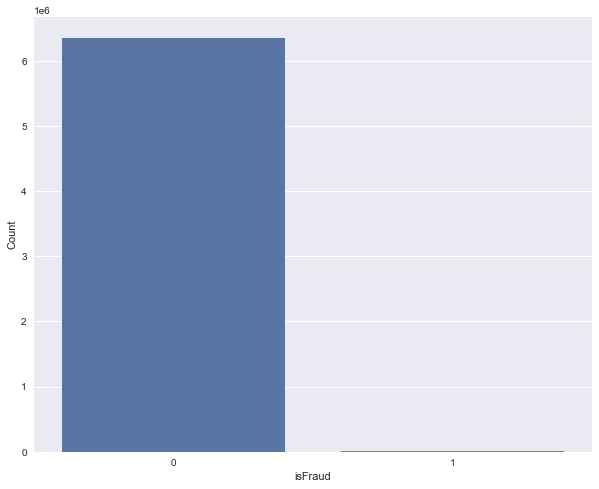

In [12]:

print(df.isFraud.value_counts())
sns.countplot(data=df, x='isFraud')
plt.ylabel('Count')
plt.show()

#### Out of total data points, 8213 are Fraud & 6354407 are not fraud.

### Which means we have an **imbalanced datatset**.

### Count values for each type of transaction

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


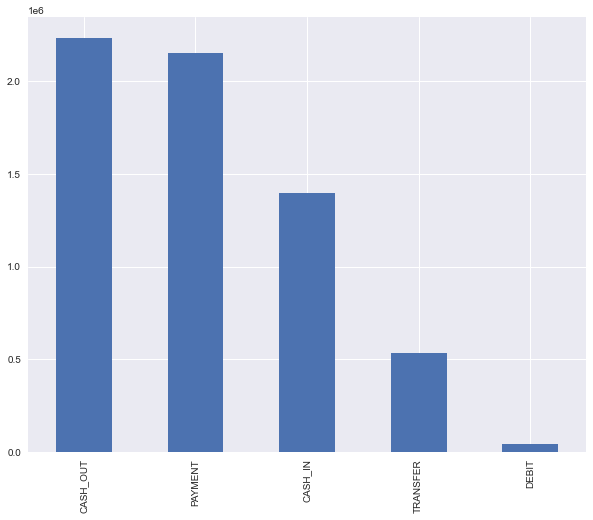

In [13]:

print(df.type.value_counts())
df.type.value_counts().plot(kind='bar')
plt.show()

### Investigating the "isFlaggedFraud" feature

In [45]:


pd.crosstab(df.isFraud,df.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


### Grouping according to the type of Transaction

In [46]:

df.groupby('type')['isFraud','isFlaggedFraud'].sum()

C:\Users\venka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


In [47]:
df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

#### -> Fraud is occuring only in 2 type of transactions: TRANSFER and CASH_OUT
#### ->The type of transactions in which isFlaggedFraud is set : TRANSFER

### Amount Vs Number of transactions


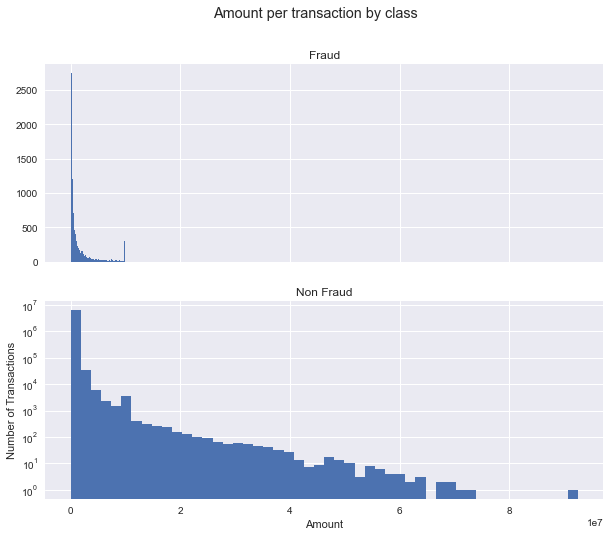

In [53]:
fraud = df[df['isFraud']==1]
normal = df[df['isFraud']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins)
ax2.set_title('Non Fraud')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

#### Less number of transaction amount in fraud ; comapared to non fraud data


### Making Dependent and Independent data sets

In [48]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

# shape of x
X.shape

(2770409, 11)

In [20]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [21]:
import pandas as pd
pd.options.mode.chained_assignment = None

### Feature Engineering 
#### Checking for Error Amount

In [22]:


X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

<AxesSubplot:>

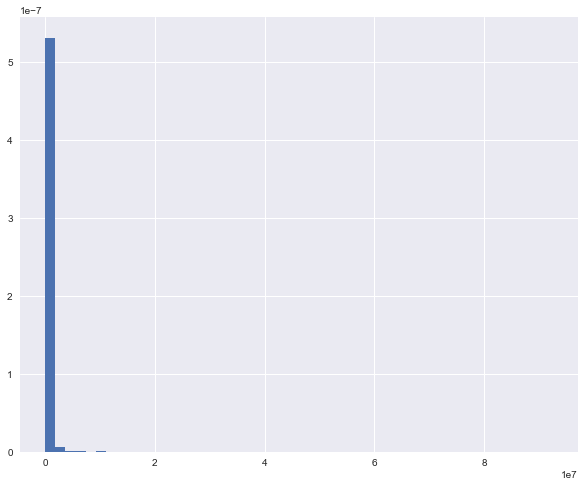

In [23]:
X['errorBalanceOrig'].hist(bins=bins, density=True)


<AxesSubplot:>

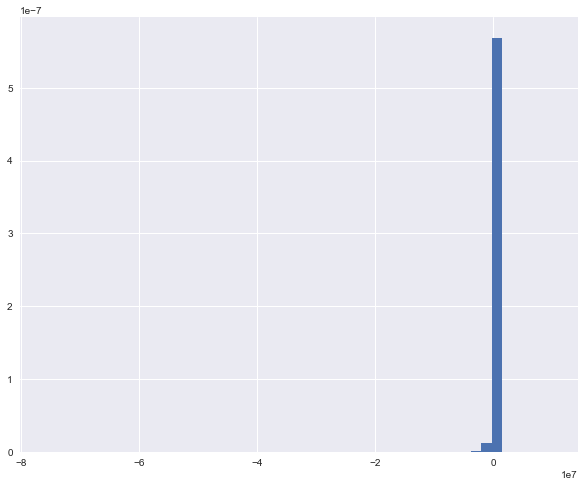

In [24]:
X['errorBalanceDest'].hist(bins=bins, density=True)


###  Removing unwanted columns


In [25]:


X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(2770409, 11)

### Label encoding for the transaction type

In [26]:


X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [27]:
# looking at the head of the data

X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0,0.00,54744.51


In [49]:
# checking for NULL values

X.isnull().any().any()

False

### Making the independent set & Removing the dependent set

In [50]:


Y = X['isFraud']  #Independent set


X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)

Shape of x:  (2770409, 10)
Shape of y:  (2770409,)


In [30]:
Y.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

In [31]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


### Over-Sampling

In [32]:
!pip install imblearn


### Using SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_resample, y_resample = oversample.fit_resample(X, Y.values.ravel())


# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (5524392, 10)
Shape of y: (5524392,)


### Splitting Dataset into Train & Tests

In [51]:


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (4419513, 10)
Shape of x_test:  (1104879, 10)
Shape of y_train:  (4419513,)
Shape of y_test:  (1104879,)


In [35]:
x_test

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
4666243,672,1,6.970741e+05,6.970741e+05,0.00,5.410021e+06,6.107095e+06,0,0.00,0.000000e+00
4257707,217,1,3.633355e+04,3.633355e+04,0.00,0.000000e+00,3.633355e+04,0,0.00,0.000000e+00
1182753,210,1,1.301779e+05,2.261050e+05,95927.11,0.000000e+00,1.301779e+05,0,0.00,0.000000e+00
3806782,482,0,4.504115e+06,4.504115e+06,0.00,0.000000e+00,0.000000e+00,0,0.00,4.504115e+06
745837,159,1,3.684186e+05,0.000000e+00,0.00,3.429453e+06,3.646534e+06,0,368418.57,1.513378e+05
...,...,...,...,...,...,...,...,...,...,...
752770,160,1,5.748627e+04,0.000000e+00,0.00,4.122570e+05,4.697433e+05,0,57486.27,1.000000e-02
2441331,394,1,1.306354e+04,0.000000e+00,0.00,7.862878e+05,9.383332e+05,0,13063.54,-1.389818e+05
4481376,172,0,7.570072e+06,7.570072e+06,0.00,0.000000e+00,0.000000e+00,0,0.00,7.570072e+06
5036901,57,0,8.276812e+04,8.276812e+04,0.00,0.000000e+00,0.000000e+00,0,0.00,8.276812e+04


In [36]:
x_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
4075301,368,0,6.196482e+04,6.196482e+04,0.000000e+00,0.000000e+00,0.000000e+00,0,0.00,6.196482e+04
320323,37,1,2.337126e+05,3.210000e+02,0.000000e+00,1.261804e+06,1.495517e+06,0,233391.62,0.000000e+00
3152929,337,0,2.362670e+05,2.362670e+05,0.000000e+00,0.000000e+00,0.000000e+00,0,0.00,2.362670e+05
3791198,463,1,7.233509e+04,7.233509e+04,0.000000e+00,4.773427e+04,1.200694e+05,0,0.00,6.290341e-12
2486284,397,1,2.780528e+05,4.218900e+04,0.000000e+00,1.099345e+05,3.879873e+05,0,235863.80,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
2249467,356,0,9.122938e+05,0.000000e+00,0.000000e+00,1.286149e+06,2.198443e+06,0,912293.75,4.656613e-10
5157699,391,0,1.000000e+07,1.166232e+07,1.662325e+06,0.000000e+00,0.000000e+00,0,0.00,1.000000e+07
2215104,354,0,6.858944e+05,0.000000e+00,0.000000e+00,3.010343e+06,3.696238e+06,0,685894.42,-1.000000e-02
1484405,255,0,1.964795e+05,0.000000e+00,0.000000e+00,3.937246e+05,5.902041e+05,0,196479.50,-1.000000e-02


In [37]:
y_train

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

### Performing standard scaling on the data for better fit

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Buliding using XGBoost Model

In [41]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier(eval_metric='logloss')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

C:\Users\venka\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The Area under Precision Recall Curve Score is 0.9994126630668446


### Taking a look at X_test (independent features) & their y_pred (Predicted outcomes)

In [42]:
for i in range(len(x_test[5])):
	print("X=%s \n Predicted=%s\n" % (x_test[i], y_pred[i]))

X=[ 2.11407298  0.72869342 -0.10164975 -0.0563288  -0.07521135  1.20836893
  1.09568647 -0.02691393 -0.22475312 -0.24534068] 
 Predicted=1

X=[-0.51150084  0.72869342 -0.44963276 -0.30840296 -0.07521135 -0.31458118
 -0.39866652 -0.02691393 -0.22475312 -0.24534068] 
 Predicted=1

X=[-0.55189428  0.72869342 -0.40020907 -0.23600468 -0.00497993 -0.31458118
 -0.37556619 -0.02691393 -0.22475312 -0.24534068] 
 Predicted=0

X=[ 1.01767952 -1.37231925  1.90335123  1.39606668 -0.07521135 -0.31458118
 -0.40761023 -0.02691393 -0.22475312  2.89687439] 
 Predicted=1

X=[-0.84618937  0.72869342 -0.27473818 -0.3222643  -0.07521135  0.6508284
  0.49000514 -0.02691393  0.33439216 -0.13976258] 
 Predicted=0

X=[ 1.48508937 -1.37231925 -0.08892765 -0.3222643  -0.07521135 -0.04699663
  0.00390783 -0.02691393  0.86985136 -0.24534069] 
 Predicted=0

X=[-1.08277954e+00  7.28693417e-01  2.39891824e+00  1.75504869e+00
 -7.52113499e-02  1.34511733e-04  1.20792422e+00 -2.69139318e-02
 -2.24753118e-01 -2.45340683e

### Confusion Matrix (TP,FP,FN,TN)

In [43]:


from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score, f1_score,confusion_matrix,accuracy_score,classification_report

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[552914    206]
 [   236 551523]]


### Important Performance Metrics 

In [44]:

print('F1 - score :',(f1_score(y_test,y_pred)))
print('\nConfusion_matrix : ')
print(confusion_matrix(y_test,y_pred))
print("\naccuracy_score")
print(accuracy_score(y_test,y_pred))
print("\nclassification_report")
print(classification_report(y_test,y_pred))

F1 - score : 0.9995994519197309

Confusion_matrix : 
[[552914    206]
 [   236 551523]]

accuracy_score
0.9995999561942982

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553120
           1       1.00      1.00      1.00    551759

    accuracy                           1.00   1104879
   macro avg       1.00      1.00      1.00   1104879
weighted avg       1.00      1.00      1.00   1104879



### The Model is performing extraordinarily, as seen above,
####  With an accuracy_score of 0.9995999561942982, F1 - score of 0.9995994519197309



### Questions

###### 1. Data cleaning including missing values, outliers and multi-collinearity.
  - Data was Checked, cleaned & pre-processed, along with necessar Exploratory Data Analysis (EDA)
  
  

###### 2. Describe your fraud detection model in elaboration.

 -- ML algorithm selection:

 -- Our approach is to oversample the minority class, by synthetic minority oversampling technique (SMOTE).

 -- I used an ML algorithm based on ensembles of decision trees that performs well on imbalanced data.It works with the missing values in our data, speeds up due to parallel-processing.XGBoost allows for weighing the positive class more compared to the negative class
 
 
 - Performance Metric selection:

 -- Due to highly skewed data, I am using the area under the precision-recall curve (AUPRC) rather than AUROC.
 
 -- F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.



###### 3. How did you select variables to be included in the model?

 - I have removed the unwanted features, whose data type wouldn't be counted, or features which don't give any significance in the fraud detection, & the ones which are completely not correlated to the target.
 - I have only kept the features, wose values directly affected the target's behaviour(Fraud/Not Fraud)
 - This was done through thorough EDA on the dataset.
 


###### 4. Demonstrate the performance of the model by using best set of tools.

 - Used best metrics like Accuracy score, classification reports, F1 score, Confusion Matrix, AUPRC
 - All the metrics used are the most predominant ones to test any classification model
 


###### 5. What are the key factors that predict fraudulent customer?

 - Type of Transaction (cash/debit/payment/transfer etc)
 - Amount of the transaction (Usually high Amts beyond a threshold indicate fraudulent ones/0
 - Balance amounts & recipients; both before & after the transactions
 - Sometimes it's Customer's Identity too
 


###### 6. Do these factors make sense? If yes, How? If not, How not?

 - Yes. These factors play a significant role in identifying a transaction as fraudulent one; as their correlation & proportionality is directly seen during the EDA process, to directly affect the target's behaviour.
 
 
 
###### 7. What kind of prevention should be adopted while company update its infrastructure?

 - Implement a real-time Fraud detection system in place
 - Secure all the data in a data-warehouse/cloud/database &b maintain/update it regularly
 - Proper authentication procedures for customers/company in terms of transactions
 - Preventing Delayed Alerts(for frauds)
 - Gaining up-to-date Insights from the data team, from the latest data points
 - Taking care of extremely high false-positives in the system
 - Maintaining & properly governing the Big Data (Mostly Unstructured)



###### 8. Assuming these actions have been implemented, how would you determine if they work?

 - Implementing the Fraud detection model in real-time, to compare the difference in fraudulent transactions counts, before & after making changes in the prevention methodologies.